# Course contents
## http://www.ais.uni-bonn.de/SS20/LabVision/
## username: labvision
## password: visionlabss20

# My email: farazi@ais.uni-bonn.de

# PyTorch basics, PyTorch Vs TF, MNIST/custom dataset

### Install course prerequisite
- https://www.anaconda.com/distribution/ Recommend Python 3.7 version
- Install cuda and Nvidia (nvidia-driver-390, nvidia-cuda-dev, nvidia-cuda-toolkit)
    - apt list --installed|grep nvidia
    - nvidia-smi
    - #sudo -S nvidia-smi -g 2 -c 0 #Compute mode is already set to DEFAULT
    - #fuser -k /dev/nvidia3 #kill
    - #sudo nvidia-smi -i 3 -r #Trigger reset of the GPU
    - #sudo fuser -v /dev/nvidia* #Show PID
- https://pytorch.org/
- Ipython and Jupyter notebook
- PyCharm
- PyQT

In [10]:
#Note magics! https://ipython.readthedocs.io/en/stable/interactive/magics.html
%time
print("hello")

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs
hello


In [11]:
#Dont forget debugging
def add_to_life_universe_everything(x):
    answer = 42
    import pdb; pdb.set_trace()
    answer += x
    
    return answer

add_to_life_universe_everything(12)

> <ipython-input-11-e79796212f42>(5)add_to_life_universe_everything()
-> answer += x
(Pdb) help

Documented commands (type help <topic>):
EOF    c          d        h         list      q        rv       undisplay
a      cl         debug    help      ll        quit     s        unt      
alias  clear      disable  ignore    longlist  r        source   until    
args   commands   display  interact  n         restart  step     up       
b      condition  down     j         next      return   tbreak   w        
break  cont       enable   jump      p         retval   u        whatis   
bt     continue   exit     l         pp        run      unalias  where    

Miscellaneous help topics:
exec  pdb

(Pdb) answer
42
(Pdb) exit


BdbQuit: 

In [7]:
import sys
print(sys.version)

3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]


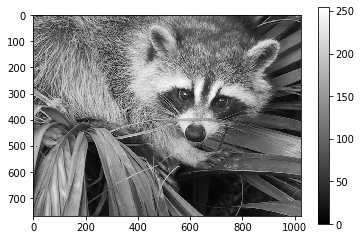

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc

a = scipy.misc.face()
plt.imshow(a[:,:,0],cmap=plt.cm.gray)
plt.colorbar()

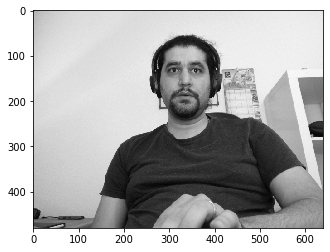

In [13]:
#OPENCV
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

# Capture frame-by-frame
ret, frame = cap.read()

# Our operations on the frame come here
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap=plt.cm.gray)

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

## Basic Python code and plotting

The box below (known as a code cell) contains the Python code to plot $y=x^2$ over the range $[0,5]$. The blue comments preceded by `#` explain what the code does.

To run the code:

1. Click on the cell to select it.
2. Press `SHIFT+ENTER` on your keyboard or press the play button (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) in the toolbar above.

A full tutorial for using the notebook interface is available [here](http://nbviewer.ipython.org/github/ipython/ipython/blob/2.x/examples/Notebook/Index.ipynb).

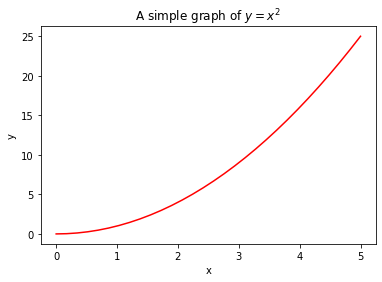

In [14]:
# Import matplotlib (plotting) and numpy (numerical arrays).
# This enables their use in the Notebook.
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
# Create an array of 30 values for x equally spaced from 0 to 5. 
x = np.linspace(0, 5, 30)
y = x**2

# Plot y versus x
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, y, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('A simple graph of $y=x^2$');

Above, you should see a plot of $y=x^2$.

You can edit this code and re-run it. For example, try replacing `y = x**2` with `y=np.sin(x)`. For a list of valid functions, see the [NumPy Reference Manual](http://docs.scipy.org/doc/numpy/reference/routines.math.html). You can also update the plot title and axis labels.

Text in the plot as well as narrative text in the notebook can contain equations that are formatted using $\LaTeX$. To edit text written in $\LaTeX$, double click on the text or press `ENTER` when the text is selected.

### What are widgets?
Widgets are eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc.

### What can they be used for?
You can use widgets to build interactive GUIs for your notebooks.
You can also use widgets to synchronize stateful and stateless information between Python and JavaScript.
### Using widgets
To use the widget framework, you need to import ipywidgets.

In [15]:
import ipywidgets as widgets
from IPython.display import display
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [16]:
w=widgets.Checkbox(
    value=False,
    description='Check me',
    disabled=False
)
display(w)

Checkbox(value=False, description='Check me')

In [17]:
print(w.value)

False


In [18]:
widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=False,
)

Dropdown(description='Number:', index=1, options=('1', '2', '3'), value='2')

In [19]:
int_range = widgets.IntSlider()
display(int_range)
    
from IPython.display import clear_output    

def on_value_change(change):
    print(change['new'])
    

int_range.observe(on_value_change, names='value')

IntSlider(value=0)

1
2
8
10
16
18
29
32
37
39
43
42
41
40
39
34
33


IntSlider(value=1, continuous_update=False, description='Test:', max=5, min=1)

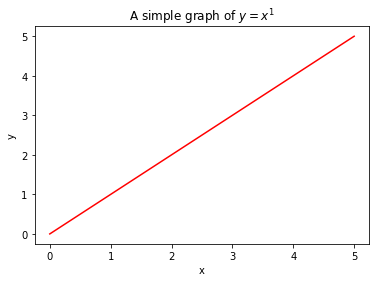

In [20]:
# Import matplotlib (plotting) and numpy (numerical arrays).
# This enables their use in the Notebook.
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
int_range = widgets.IntSlider(
    value=7,
    min=1,
    max=5,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(int_range)

def on_value_change(change):
    clear_output()
    display(int_range)
    # Create an array of 30 values for x equally spaced from 0 to 5. 
    x = np.linspace(0, 5, 30)
    y = x**int(change['new'])

    # Plot y versus x
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.plot(x, y, color='red')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('A simple graph of $y=x^'+str(change['new'])+'$');

int_range.observe(on_value_change, names='value')


# IpyVolume
IPyvolume is a Python library to visualize 3d volumes and glyphs (e.g. 3d scatter plots), in the Jupyter notebook, with minimal configuration and effort. It is currently pre-1.0, so use at own risk. IPyvolume’s volshow is to 3d arrays what matplotlib’s imshow is to 2d arrays.

For quick resuls, use ipyvolume.widgets.quickvolshow. From a numpy array, we create two boxes, using slicing, and visualize it.

In [21]:
import numpy as np
import ipyvolume as ipv
V = np.zeros((128,128,128)) # our 3d array
# outer box
V[30:-30,30:-30,30:-30] = 0.75
V[35:-35,35:-35,35:-35] = 0.0
# inner box
V[50:-50,50:-50,50:-50] = 0.25
V[55:-55,55:-55,55:-55] = 0.0
ipv.quickvolshow(V, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)

/home/hafez/anaconda3/lib/python3.7/site-packages/ipyvolume/serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


Simple scatter plots are also supported.

In [22]:
import ipyvolume as ipv
import numpy as np
x, y, z = np.random.random((3, 10000))
ipv.quickscatter(x, y, z, size=1, marker="sphere")

Quiver plots are also supported, showing a vector at each point.

In [23]:
import ipyvolume as ipv
import numpy as np
x, y, z, u, v, w = np.random.random((6, 1000))*2-1
ipv.quickquiver(x, y, z, u, v, w, size=5)

And surface/mesh plots, showing surfaces or wireframes.

In [18]:
import ipyvolume as ipv
x, y, z, u, v = ipv.examples.klein_bottle(draw=False)
ipv.figure()
m = ipv.plot_mesh(x, y, z, wireframe=False)
ipv.squarelim()
ipv.show()

For anything more sophisticed, use ipyvolume.pylab, ipyvolume’s copy of matplotlib’s 3d plotting (+ volume rendering).

Since ipyvolume is built on ipywidgets, we can link widget’s properties.

In [24]:
import ipyvolume as ipv
import numpy as np
x, y, z, u, v, w = np.random.random((6, 1000))*2-1
selected = np.random.randint(0, 1000, 100)
ipv.figure()
quiver = ipv.quiver(x, y, z, u, v, w, size=5, size_selected=8, selected=selected)

from ipywidgets import FloatSlider, ColorPicker, VBox, jslink
size = FloatSlider(min=0, max=30, step=0.1)
size_selected = FloatSlider(min=0, max=30, step=0.1)
color = ColorPicker()
color_selected = ColorPicker()
jslink((quiver, 'size'), (size, 'value'))
jslink((quiver, 'size_selected'), (size_selected, 'value'))
jslink((quiver, 'color'), (color, 'value'))
jslink((quiver, 'color_selected'), (color_selected, 'value'))
VBox([ipv.gcc(), size, size_selected, color, color_selected])

# ------------------------------------------------------------------------------------------------------------

# http://pytorch.org/


What is PyTorch?
================

It’s a Python based scientific computing package targeted at two sets of
audiences:

-  A replacement for numpy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility
   and speed

Getting Started
---------------
### Tensor

Tensors are similar to numpy’s ndarrays, with the addition being that
Tensors can also be used on a GPU to accelerate computing.



In [25]:
import torch
print(torch.__version__)

1.5.0


Construct a 5x3 matrix, uninitialized:



In [26]:
x = torch.Tensor(5, 3)
print(x)

tensor([[1.2928e-16, 4.5556e-41, 1.2928e-16],
        [4.5556e-41, 2.1459e+20, 9.2489e-04],
        [4.5445e+30, 1.7260e+25, 1.2118e+25],
        [4.8354e+30, 1.4603e-19, 1.9432e-19],
        [7.1441e+31, 9.4048e+08, 1.8037e+28]])


In [27]:
x = torch.empty(5, 3)
print(x)

tensor([[0.0000e+00, 0.0000e+00, 1.8788e+31],
        [1.7220e+22, 2.4174e-06, 1.7681e-04],
        [1.3029e-11, 1.3076e+22, 4.2483e-05],
        [2.7451e-06, 2.1066e-07, 4.2929e-08],
        [3.4005e-06, 3.1369e+27, 7.0800e+31]])


In [28]:
#Construct a matrix filled zeros and of dtype long:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [29]:
#Construct a tensor directly from data:
x = torch.tensor([[5.5, 3],[1,2]])
print(x)

tensor([[5.5000, 3.0000],
        [1.0000, 2.0000]])


In [30]:
#copy by refrence
xtmp=x
xtmp[0,0]=9
print(xtmp)
print(x)

tensor([[9., 3.],
        [1., 2.]])
tensor([[9., 3.],
        [1., 2.]])


In [31]:
xtmp=x.clone()
xtmp[0]=7
print(xtmp)
print(x)

tensor([[7., 7.],
        [1., 2.]])
tensor([[9., 3.],
        [1., 2.]])


Construct a randomly initialized matrix



#### Get the current default floating point torch.dtype

In [32]:
torch.get_default_dtype()

torch.float32

#### default dtype for a tensor can only be a float type

In [33]:
torch.set_default_dtype(torch.int)

TypeError: only floating-point types are supported as the default type

#### The default floating point dtype is initially torch.float32
#### Set the default floating point to torch.float64

In [34]:
torch.set_default_dtype(torch.float64)

In [35]:
torch.get_default_dtype()

torch.float64

#### Creating Tensors

In [36]:
tensor_arr = torch.Tensor([[1,2,3], [4,5,6]])
tensor_arr

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [37]:
torch.is_tensor(tensor_arr)

True

#### numel() returns the number of elements in a tensor

In [33]:
torch.numel(tensor_arr)

6

#### An un-initialized Tensor of shape 2X2 allocated space in memory

In [38]:
tensor_uninitialized = torch.Tensor(2, 2) #un allocated

In [39]:
tensor_uninitialized

tensor([[ 0.0000e+00, 5.3028e+180],
        [ 1.5708e-76,  4.5775e-71]])

#### A tensor of size 2x2 initialized with random values

In [40]:
tensor_initialized = torch.rand(2, 2)

In [41]:
tensor_initialized

tensor([[0.4645, 0.9549],
        [0.6718, 0.2950]])

In [42]:
torch.typename(tensor_initialized)

'torch.DoubleTensor'

#### Tensors can be set to have specific data types

In [43]:
tensor_int = torch.tensor([5, 3]).type(torch.IntTensor) #This is on CPU if you want it on GPU you can use torch.cuda.IntTensor
tensor_int

tensor([5, 3], dtype=torch.int32)

#### A Tensor of type short

In [44]:
tensor_short = torch.ShortTensor([1.0, 2.0, 3.0])   
tensor_short

tensor([1, 2, 3], dtype=torch.int16)

#### A Tensor of type float half (float16)

In [45]:
tensor_float = torch.tensor([1.0, 2.0, 3.0]).type(torch.half)
tensor_float

tensor([1., 2., 3.], dtype=torch.float16)

#### A tensor filled with a specific values


In [47]:
tensor_fill = torch.full((2, 6), fill_value=10)
tensor_fill

tensor([[10., 10., 10., 10., 10., 10.],
        [10., 10., 10., 10., 10., 10.]])

#### A tensor of size (2,4) containing all ones

In [48]:
tensor_of_ones = torch.ones([2, 4], dtype=torch.int32)
tensor_of_ones

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1]], dtype=torch.int32)

#### A tensor of size (2,4) like tensor_of_ones containing all zeroes

In [49]:
tensor_of_zeroes = torch.zeros_like(tensor_of_ones)
tensor_of_zeroes

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)

#### Create an identity 5X5 tensor

In [50]:
tensor_eye = torch.eye(5)
tensor_eye

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

#### Get the list of indices of non-zero elements in a tensor
[ i, j ] index for non-zero elements

In [52]:
non_zero = torch.nonzero(tensor_eye)
non_zero

tensor([[0, 0],
        [1, 1],
        [2, 2],
        [3, 3],
        [4, 4]])

#### Create a sparse tensor using coordinates specified by indices and values

In [49]:
i = torch.tensor([[0, 1, 1],
                  [2, 2, 0]])

In [50]:
v = torch.tensor([3, 4, 5], dtype=torch.float32)

In [51]:
sparse_tensor = torch.sparse_coo_tensor(i, v, [2, 5])

In [52]:
sparse_tensor.data

tensor(indices=tensor([[0, 1, 1],
                       [2, 2, 0]]),
       values=tensor([3., 4., 5.]),
       size=(2, 5), nnz=3, dtype=torch.float32, layout=torch.sparse_coo)

In [53]:
sparse_tensor.to_dense()

tensor([[0., 0., 3., 0., 0.],
        [5., 0., 4., 0., 0.]], dtype=torch.float32)

## Inplace / Out-of-place
The first difference is that ALL operations on the tensor that operate in-place on it will have an "\_" postfix. For example, add is the out-of-place version, and add\_ is the in-place version.

#### .fill_ is in-place operation and it doesnt have any out-place equivalent

In [62]:
initial_tensor = torch.rand(2, 3) 

initial_tensor

tensor([[0.6525, 0.9106, 0.5492],
        [0.9783, 0.2654, 0.9169]])

In [63]:
initial_tensor.fill_(10) 

tensor([[10., 10., 10.],
        [10., 10., 10.]])

In [66]:
# initial_tensor.fill(10) 
newT=torch.ones_like(initial_tensor)*10
newT

tensor([[10., 10., 10.],
        [10., 10., 10.]])

#### The add() method does an out-of-place add operation and returns a new tensor
This is assigned to the new_tensor variable

In [57]:
new_tensor = initial_tensor.add(5)
new_tensor

tensor([[15., 15., 15.],
        [15., 15., 15.]])

#### The original tensor is unchanged

In [58]:
initial_tensor

tensor([[10., 10., 10.],
        [10., 10., 10.]])

#### The add\_ method does an in-place add, changing the calling tensor

In [59]:
initial_tensor.add_(8)
initial_tensor

tensor([[18., 18., 18.],
        [18., 18., 18.]])

#### The new_tensor was a separate copy and is unaffected

In [60]:
new_tensor

tensor([[15., 15., 15.],
        [15., 15., 15.]])

#### In-place version of sqrt()

In [61]:
new_tensor.sqrt_()
new_tensor

tensor([[3.8730, 3.8730, 3.8730],
        [3.8730, 3.8730, 3.8730]])

### Indexing, Slicing, Joining, Mutating Ops

#### Slicing

In [62]:
x = torch.linspace(start=0.1, end=10.0, steps=15)
x

tensor([ 0.1000,  0.8071,  1.5143,  2.2214,  2.9286,  3.6357,  4.3429,  5.0500,
         5.7571,  6.4643,  7.1714,  7.8786,  8.5857,  9.2929, 10.0000])

#### Splits a tensor into a specific number of chunks.
- tensor (Tensor) – the tensor to split
- chunks (int) – number of chunks to return
- dim (int) – dimension along which to split the tensor


In [63]:
tensor_chunk = torch.chunk(x, 3, 0)
tensor_chunk

(tensor([0.1000, 0.8071, 1.5143, 2.2214, 2.9286]),
 tensor([3.6357, 4.3429, 5.0500, 5.7571, 6.4643]),
 tensor([ 7.1714,  7.8786,  8.5857,  9.2929, 10.0000]))

#### Concatenates the  sequence of tensors along the given dimension

All tensors must either have the same shape (except in the concatenating dimension) or be empty.

In [64]:
tensor1 = tensor_chunk[0]
tensor2 = tensor_chunk[1]
tensor3 = torch.tensor([3.0, 4.0, 5.0])

torch.cat((tensor1, tensor2, tensor3), 0)

tensor([0.1000, 0.8071, 1.5143, 2.2214, 2.9286, 3.6357, 4.3429, 5.0500, 5.7571,
        6.4643, 3.0000, 4.0000, 5.0000])

In [53]:
random_tensor = torch.Tensor([[10, 8, 30], [40, 5, 6], [12, 2, 21]])
random_tensor

tensor([[10.,  8., 30.],
        [40.,  5.,  6.],
        [12.,  2., 21.]])

In [55]:
random_tensor[0, 1]

tensor(8.)

In [67]:
random_tensor[1:, 1:]

tensor([[ 5.,  6.],
        [ 2., 21.]])

#### Splits the tensor into chunks

In [68]:
random_tensor_split = torch.split(random_tensor, 2)
random_tensor_split

(tensor([[10.,  8., 30.],
         [40.,  5.,  6.]]),
 tensor([[12.,  2., 21.]]))

#### View

In [69]:
random_tensor

tensor([[10.,  8., 30.],
        [40.,  5.,  6.],
        [12.,  2., 21.]])

In [70]:
random_tensor.size()

torch.Size([3, 3])

In [71]:
resized_tensor = random_tensor.view(9)  
resized_tensor

tensor([10.,  8., 30., 40.,  5.,  6., 12.,  2., 21.])

In [56]:
resized_tensor = random_tensor.view(-1, 3)  
resized_tensor

tensor([[10.,  8., 30.],
        [40.,  5.,  6.],
        [12.,  2., 21.]])

In [73]:
resized_tensor.size()

torch.Size([9])

#### view() does not create a deep copy - just a view as the name suggests
Modifying the original tensor affects the resized_tensor as they both point to the same space in memory

In [74]:
random_tensor[2, 2] = 100.0
resized_tensor

tensor([ 10.,   8.,  30.,  40.,   5.,   6.,  12.,   2., 100.])

#### Unsqueeze
Returns a new tensor with a dimension of size one inserted at the specified position.

In [75]:
random_tensor

tensor([[ 10.,   8.,  30.],
        [ 40.,   5.,   6.],
        [ 12.,   2., 100.]])

In [76]:
random_tensor.shape

torch.Size([3, 3])

In [58]:
tensor_unsqueeze = torch.unsqueeze(random_tensor, 2)
tensor_unsqueeze.shape

torch.Size([3, 3, 1])

In [60]:
tensor_unsqueeze.squeeze(2).shape

torch.Size([3, 3])

#### Transpose

#### Returns a tensor that is a transposed version of input. The given dimensions dim0 and dim1 are swapped.

In [79]:
initial_tensor

tensor([[18., 18., 18.],
        [18., 18., 18.]])

In [80]:
tensor_transpose = torch.transpose(initial_tensor, 0, 1)
tensor_transpose

tensor([[18., 18.],
        [18., 18.],
        [18., 18.]])

#### Sorting tensors
Tensors can be sorted along a specified dimension. If no dimension is specified, the last dimension is picked by default

In [81]:
random_tensor

tensor([[ 10.,   8.,  30.],
        [ 40.,   5.,   6.],
        [ 12.,   2., 100.]])

In [82]:
sorted_tensor, sorted_indices = torch.sort(random_tensor)#Default last dim of the Tensor

In [83]:
sorted_tensor

tensor([[  8.,  10.,  30.],
        [  5.,   6.,  40.],
        [  2.,  12., 100.]])

In [84]:
sorted_indices

tensor([[1, 0, 2],
        [1, 2, 0],
        [1, 0, 2]])

# Math Operations
Pytorch supports a number of mathematical operations which can be performed on tensors. We take a look at a few of them here

In [85]:
tensor_float = torch.FloatTensor([-1.1, -2.2, 3.3])
tensor_float

tensor([-1.1000, -2.2000,  3.3000], dtype=torch.float32)

#### Absolute values

In [86]:
tensor_abs = torch.abs(tensor_float)      
tensor_abs

tensor([1.1000, 2.2000, 3.3000], dtype=torch.float32)

In [87]:
initial_tensor

tensor([[18., 18., 18.],
        [18., 18., 18.]])

In [88]:
new_tensor = torch.add(initial_tensor, 2)
new_tensor

tensor([[20., 20., 20.],
        [20., 20., 20.]])

In [89]:
torch.add(initial_tensor, 10, new_tensor)

tensor([[218., 218., 218.],
        [218., 218., 218.]])

In [90]:
rand1 = torch.abs(torch.randn(2, 3))
rand2 = torch.abs(torch.randn(2, 3))

In [91]:
add1 = rand1 + rand2
add1

tensor([[1.4905, 0.4035, 2.2709],
        [0.5792, 1.5629, 2.0552]])

#### The add() method does an out-of-place add operation and returns a new tensor
This is assigned to the new_tensor variable

In [92]:
add2 = torch.add(rand1, rand2)
add2

tensor([[1.4905, 0.4035, 2.2709],
        [0.5792, 1.5629, 2.0552]])

In [93]:
tensor = torch.Tensor([[-1, -2, -3],
                       [ 1,  2,  3]])

#### Element-wise division
The div() and mul() functions can be used to divide and multiply the values in a tensor. Here, we do an element-wise division between two tensors

In [94]:
tensor_div = torch.div(tensor, tensor + 0.3)
tensor_div

tensor([[1.4286, 1.1765, 1.1111],
        [0.7692, 0.8696, 0.9091]])

#### Element-wise multiplicaton

In [95]:
tensor_mul = torch.mul(tensor, tensor)
tensor_mul

tensor([[1., 4., 9.],
        [1., 4., 9.]])

#### Clamp the value of a Tensor
There will be occasions where you would like to set upper and lower limits for the values in a tensor. This is where the clamp function is used. The value of an element is set to:
* min if if x<sub>i</sub> < min
* x<sub>i</sub> if min < x<sub>i</sub> < max
* max if x<sub>i</sub> > max

In [96]:
tensor_clamp = torch.clamp(tensor, min= -0.2, max=2)
tensor_clamp

tensor([[-0.2000, -0.2000, -0.2000],
        [ 1.0000,  2.0000,  2.0000]])

## Vector Multiplication 

#### Dot product

In [97]:
t1 = torch.Tensor([1, 2])
t2 = torch.Tensor([10, 20])

In [98]:
dot_product = torch.dot(t1, t2) 
dot_product

tensor(50.)

#### Matrix Vector product
If mat is a (n×m) tensor, vec is a 1-D tensor of size m, out will be 1-D of size n.

In [99]:
matrix = torch.Tensor([[1, 2, 3],
                       [4, 5, 6]])

vector = torch.Tensor([0, 1, 2])

In [100]:
matrix_vector = torch.mv(matrix, vector)
matrix_vector

tensor([ 8., 17.])

#### Matrix multiplication

In [101]:
another_matrix = torch.Tensor([[10, 30],
                               [20, 0],
                               [0 , 50]])

In [102]:
matrix_mul = torch.mm(matrix, another_matrix)
matrix_mul

tensor([[ 50., 180.],
        [140., 420.]])

#### Returns the indices of the maximum values of a tensor across a dimension.

In [103]:
torch.argmax(matrix_mul, dim=1)

tensor([1, 1])

In [104]:
torch.argmin(matrix_mul, dim=1)

tensor([0, 0])

# Seeds for Reporducibility

In [79]:
torch.manual_seed(1)
x = torch.rand(5, 3)
print(x)

tensor([[0.0611, 0.2246, 0.2343],
        [0.1771, 0.5561, 0.1094],
        [0.4609, 0.7084, 0.5798],
        [0.4967, 0.5104, 0.3295],
        [0.7182, 0.3845, 0.0898]])


In [80]:
np.random.seed(1)
np.random.rand(2,2)

array([[4.17022005e-01, 7.20324493e-01],
       [1.14374817e-04, 3.02332573e-01]])

In [ ]:
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(1)

Get its size



In [107]:
print(x.size())
print(x.shape)

torch.Size([5, 3])
torch.Size([5, 3])


<div class="alert alert-info"><h4>Note</h4><p>``torch.Size`` is in fact a tuple, so it supports the same operations</p></div>

### Operations

There are multiple syntaxes for operations. Let's see addition as an example

Addition: syntax 1



In [108]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x)
print(y)

tensor([[0.1175, 0.6402, 0.1968],
        [0.5124, 0.7118, 0.9249],
        [0.9997, 0.8927, 0.8767],
        [0.8450, 0.1544, 0.1705],
        [0.9842, 0.8127, 0.4358]])
tensor([[0.4143, 0.4284, 0.7578],
        [0.9225, 0.9643, 0.1760],
        [0.9539, 0.3134, 0.4544],
        [0.2956, 0.1875, 0.2433],
        [0.3493, 0.4441, 0.4069]])


In [109]:
print(x + y)

tensor([[0.5318, 1.0686, 0.9545],
        [1.4350, 1.6762, 1.1009],
        [1.9536, 1.2061, 1.3311],
        [1.1405, 0.3420, 0.4138],
        [1.3335, 1.2568, 0.8427]])


Addition: syntax 2



In [110]:
print(torch.add(x, y))

tensor([[0.5318, 1.0686, 0.9545],
        [1.4350, 1.6762, 1.1009],
        [1.9536, 1.2061, 1.3311],
        [1.1405, 0.3420, 0.4138],
        [1.3335, 1.2568, 0.8427]])


Addition: giving an output tensor



In [111]:
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[0.5318, 1.0686, 0.9545],
        [1.4350, 1.6762, 1.1009],
        [1.9536, 1.2061, 1.3311],
        [1.1405, 0.3420, 0.4138],
        [1.3335, 1.2568, 0.8427]])


Addition: in-place



In [112]:
# adds x to y
y.add_(x)
print(y)

tensor([[0.5318, 1.0686, 0.9545],
        [1.4350, 1.6762, 1.1009],
        [1.9536, 1.2061, 1.3311],
        [1.1405, 0.3420, 0.4138],
        [1.3335, 1.2568, 0.8427]])


<div class="alert alert-info"><h4>Note</h4><p>Any operation that mutates a tensor in-place is post-fixed with an ``_``
    For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.</p></div>

You can use standard numpy-like indexing with all bells and whistles!



In [113]:
print(x)
print(x[1, :])

tensor([[0.1175, 0.6402, 0.1968],
        [0.5124, 0.7118, 0.9249],
        [0.9997, 0.8927, 0.8767],
        [0.8450, 0.1544, 0.1705],
        [0.9842, 0.8127, 0.4358]])
tensor([0.5124, 0.7118, 0.9249])


In [114]:
# If you have a one element tensor, use .item() to get the value as a Python number
x = torch.randn(1)

print(x)
print(x.item())

tensor([-0.4039])
-0.4039495265960795


**Read later:**


  100+ Tensor operations, including transposing, indexing, slicing,
  mathematical operations, linear algebra, random numbers, etc are described
  here: <http://pytorch.org/docs/torch>

Numpy Bridge
------------

Converting a torch Tensor to a numpy array and vice versa is a breeze.

The torch Tensor and numpy array will share their underlying memory
locations, and changing one will change the other.

### Converting torch Tensor to numpy Array




In [115]:
a = torch.zeros(5)
print(a)

tensor([0., 0., 0., 0., 0.])


In [116]:
b = a.numpy()
print(b)
print(type(b))

[0. 0. 0. 0. 0.]
<class 'numpy.ndarray'>


See how the numpy array changed in value.



In [117]:
a.add_(1)
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


### Converting numpy Array to torch Tensor

See how changing the np array changed the torch Tensor automatically



In [118]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.])


In [119]:
np_array_new = np.ones((2,2),dtype=np.int32)
torch.from_numpy(np_array_new) # The only supported types are: double, float32 , float64, int64, int32, and uint8

tensor([[1, 1],
        [1, 1]], dtype=torch.int32)

In [120]:
arr = [[1,2,3],[3,4,5]]

In [121]:
np.array(arr,dtype=np.float)

array([[1., 2., 3.],
       [3., 4., 5.]])

In [122]:
torch.Tensor([[1,2,3],[3,4,5]])

tensor([[1., 2., 3.],
        [3., 4., 5.]])

## Interoperablity between Numpy arrays and Pytorch Tensors

In [123]:
import numpy as np
import torch

#### Converting tensor to numpy arrays

In [88]:
tensor2 = torch.rand(4, 3)
id(tensor2)

139622667232032

In [86]:
id(tensor)

139622656422608

### The numpy arrays use the same memory as the PyTorch tensor

In [126]:
numpy_from_tensor = tensor.numpy()                   
numpy_from_tensor

array([[0.32176585, 0.36390263, 0.29850985],
       [0.66353087, 0.25516697, 0.41437192],
       [0.83955493, 0.74183253, 0.28649119],
       [0.79285889, 0.50011633, 0.89774049]])

In [127]:
type(numpy_from_tensor)

numpy.ndarray

In [128]:
torch.is_tensor(tensor)

True

In [129]:
torch.is_tensor(numpy_from_tensor)

False

#### The NumPy array and the Torch tensor share memory

In [130]:
numpy_from_tensor[0, 0] = 100.0

numpy_from_tensor

array([[100.        ,   0.36390263,   0.29850985],
       [  0.66353087,   0.25516697,   0.41437192],
       [  0.83955493,   0.74183253,   0.28649119],
       [  0.79285889,   0.50011633,   0.89774049]])

In [131]:
tensor

tensor([[100.0000,   0.3639,   0.2985],
        [  0.6635,   0.2552,   0.4144],
        [  0.8396,   0.7418,   0.2865],
        [  0.7929,   0.5001,   0.8977]])

#### Converting a numpy array to a Tensor

In [132]:
numpy_arr = np.array([[1.0, 2.0, 3.0], 
                      [10.0, 20.0, 30.0],
                      [100.0, 200.0, 300.0]])

numpy_arr

array([[  1.,   2.,   3.],
       [ 10.,  20.,  30.],
       [100., 200., 300.]])

In [133]:
tensor_from_numpy = torch.from_numpy(numpy_arr)
tensor_from_numpy

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [134]:
type(tensor_from_numpy)

torch.Tensor

In [135]:
torch.is_tensor(tensor_from_numpy)

True

#### The Numpy arrays and Tensor share the same memory
The tensor and numpy_from_tensor are shallow copies and share the same memory as the original numpy array. Modifying the original array affects the values of both tensor and numpy_from_tensor

In [136]:
tensor_from_numpy[0] = 1
tensor_from_numpy

tensor([[  1.,   1.,   1.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [137]:
numpy_arr

array([[  1.,   1.,   1.],
       [ 10.,  20.,  30.],
       [100., 200., 300.]])

#### Convert the data into a torch.Tensor. 

If the data is already a Tensor with the same dtype and device, no copy will be performed, otherwise a new Tensor will be returned

In [138]:
np_array_one = np.array([4, 8])
np_array_one

array([4, 8])

In [139]:
tensor_from_array_one = torch.as_tensor(np_array_one) #Performs copy if the data is not already a tensor
tensor_from_array_one

tensor([4, 8])

In [140]:
np_array_one[1] = 5
np_array_one

array([4, 5])

In [141]:
tensor_from_array_one

tensor([4, 5])

#### torch.tensor() reads out the data from whatever it is passed, and constructs a leaf variable

In [142]:
np_array_two = np.array([2, 2])
np_array_two

array([2, 2])

In [143]:
tensor_from_array_two = torch.tensor(np_array_two)#Always copy

tensor_from_array_two

tensor([2, 2])

#### in this method the tensor and array do not share memory

In [144]:
np_array_two[1] = 4
np_array_two

array([2, 4])

In [145]:
tensor_from_array_two

tensor([2, 2])

All the Tensors on the CPU except a CharTensor support converting to
NumPy and back.

CUDA Tensors
------------

Tensors can be moved onto GPU using the ``.cuda`` function.



In [146]:
torch.cuda.is_available()

True

In [147]:
# let us run this cell only if CUDA is available
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    print(type(y))
    print(x + y)
    print(type(x+y))
    ycpu=y.cpu()
    print(type(ycpu))

<class 'torch.Tensor'>
tensor([[ 0.1278,  0.6647,  0.5506],
        [ 1.0310,  1.2722,  0.6969],
        [ 1.5496,  0.8022,  0.9272],
        [ 0.7366, -0.0620,  0.0098],
        [ 0.9295,  0.8528,  0.4388]], device='cuda:0')
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [148]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([0.5961], device='cuda:0')
tensor([0.5961])


## Cuda

In [150]:
torch.cuda.is_available()

True

In [60]:
# Initialize PyTorch’s CUDA state. You may need to call this explicitly if you are interacting 
# with PyTorch via its C API

torch.cuda.init()

In [61]:
torch.cuda.current_device()

0

In [62]:
torch.cuda.device_count()

2

In [63]:
torch.cuda.memory_allocated()

7168

In [64]:
torch.cuda.memory_cached() #Behind the scenes Pytorch uses a caching memory allocator to speed up memory allocations 
#this allows fast memory deallocation withput device synchronizations

1048576

In [156]:
cuda = torch.device('cuda') #device context manager

cuda

device(type='cuda')

In [158]:
cuda0 = torch.device('cuda:0')
cuda1 = torch.device('cuda:1')
cuda2 = torch.device('cuda:2')

In [67]:
cuda0, cuda1, cuda2

(device(type='cuda', index=0),
 device(type='cuda', index=1),
 device(type='cuda', index=2))

In [91]:
x = torch.tensor([10., 20.])

x

tensor([10., 20.])

In [69]:
x_default = torch.tensor([10., 20.], device=cuda)

x_default

tensor([10., 20.], device='cuda:0')

In [159]:
x0 = torch.tensor([10., 20.], device=cuda0)

x0

tensor([10., 20.], device='cuda:0')

In [71]:
x1 = torch.tensor([10., 20.], device=cuda1)

x1

tensor([10., 20.], device='cuda:1')

In [72]:
x2 = torch.tensor([10., 20.], device=cuda2)

x2

RuntimeError: CUDA error: invalid device ordinal

### Returns a copy of this object in CUDA memory.

If this object is already in CUDA memory and on the correct device, then no copy is performed and the original object is returned.

In [92]:
# Transferring a tensor from CPU to GPU 0
y = x.cuda()

y

tensor([10., 20.], device='cuda:0')

In [74]:
# Transferring a tensor from GPU 1 to GPU 0
y0 = x1.cuda()

y0

tensor([10., 20.], device='cuda:0')

In [75]:
print('Outside with context: ', torch.cuda.current_device())

with torch.cuda.device(1):
    
    print('Inside with context: ', torch.cuda.current_device())

print('Outside with context again: ', torch.cuda.current_device())

Outside with context:  0
Inside with context:  1
Outside with context again:  0


In [76]:
with torch.cuda.device(1):
    
    a = torch.tensor([10., 20.])
    
    a0 = torch.tensor([10., 20.], device=cuda0)
    
    a1 = torch.tensor([10., 20.], device=cuda)

In [77]:
a

tensor([10., 20.])

In [78]:
a0

tensor([10., 20.], device='cuda:0')

In [79]:
a1

tensor([10., 20.], device='cuda:1')

In [80]:
b1 = a0.to(device=cuda1)

b1

tensor([10., 20.], device='cuda:1')

In [81]:
sum_a = a + a0

RuntimeError: expected type torch.FloatTensor but got torch.cuda.FloatTensor

In [82]:
sum_a = a1 + a0

RuntimeError: binary_op(): expected both inputs to be on same device, but input a is on cuda:1 and input b is on cuda:0

In [83]:
sum_ax = a1 + x1

sum_ax

tensor([20., 40.], device='cuda:1')

In [84]:
torch.cuda.memory_allocated()

9728

In [85]:
torch.cuda.memory_cached()

1048576

In [86]:
torch.cuda.empty_cache()

In [87]:
torch.cuda.memory_cached()

1048576

### torch.Tensor.new_* functions preserve the type and the device of the original tensor

In [160]:
preserve_context = x.new_full([2, 2], fill_value=1.1)

preserve_context

tensor([[1.1000, 1.1000],
        [1.1000, 1.1000]], device='cuda:0')

In [161]:
preserve_context0 = x0.new_full([2, 2], fill_value=1.1)

preserve_context0

tensor([[1.1000, 1.1000],
        [1.1000, 1.1000]], device='cuda:0')

In [162]:
preserve_context1 = x1.new_full([2, 2], fill_value=1.1)

preserve_context1

NameError: name 'x1' is not defined

# PyTorch Vs. Tensorflow
<img src="1.png">
<img src="3.png">
<img src="4.png">
<img src="5.png">

## Install and setup

In [163]:
!pip install tensorflow

     |████████████████████████████████| 516.2 MB 8.7 kB/s eta 0:00:016   |██                              | 33.7 MB 3.9 MB/s eta 0:02:06     |████████                        | 127.9 MB 6.9 MB/s eta 0:00:57     |██████████████▌                 | 233.5 MB 3.3 MB/s eta 0:01:27     |████████████████████████▏       | 390.6 MB 2.9 MB/s eta 0:00:44     |█████████████████████████▍      | 409.1 MB 3.4 MB/s eta 0:00:32
     |████████████████████████████████| 1.3 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 454 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 522 kB/s eta 0:00:01
     |████████████████████████████████| 63 kB 299 kB/s eta 0:00:01
     |████████████████████████████████| 42 kB 179 kB/s eta 0:00:01
     |████████████████████████████████| 89 kB 

In [164]:
!pip install graphviz

In [165]:
!pip install hiddenlayer

## Pytorch (Dynamic Computation Graph)

In [166]:
W = torch.randn(6)

x = torch.tensor([10.0, 10.0, 10.0, 10.0, 10.0, 10.0])

b = torch.tensor(3)

In [167]:
W

tensor([ 1.7584,  1.0415,  0.8091,  0.5292, -0.0445,  0.0581])

In [168]:
y = W*x + b

In [169]:
y

tensor([20.5840, 13.4146, 11.0915,  8.2920,  2.5554,  3.5814])

In [170]:
W*x

tensor([17.5840, 10.4146,  8.0915,  5.2920, -0.4446,  0.5814])

In [173]:
b

tensor(3)

In [174]:
W1 = torch.tensor(6)
W2 = torch.tensor(6)
W3 = torch.tensor(6)

x1 = torch.tensor([2, 2, 2])
x2 = torch.tensor([3, 3, 3])
x3 = torch.tensor([4, 4, 4])

b = torch.tensor(10)

In [175]:
W1, W2, W3

(tensor(6), tensor(6), tensor(6))

In [176]:
intermediate_value = W1 * x1 + W2 * x2

intermediate_value

tensor([30, 30, 30])

In [177]:
final_value = W1 * x1 + W2 * x2 + W3 * x3 + b

final_value

tensor([64, 64, 64])

### Viewing PyTorch computation graphs

https://github.com/waleedka/hiddenlayer

#### Computation Graph

In [178]:
import hiddenlayer as hl

In [179]:
x_train = np.array ([[1.7], [2.5], [5.5], [7.9], [8.8],
                     [2.4],[2.4], [8.89], [5], [4.4]],
                    dtype = np.float32)

y_train = np.array ([[1.9], [2.68], [4.22], [8.19], [9.69],
                     [3.4],[2.6], [8.8], [5.6], [4.7]],
                    dtype = np.float32)

In [180]:
X_train = torch.tensor(x_train)
Y_train = torch.tensor(y_train)

X_train.shape

torch.Size([10, 1])

In [181]:
inp = 1
out = 1

hid = 100

In [184]:
model1 = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                             torch.nn.Linear(hid, out))

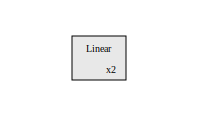

In [185]:
hl.build_graph(model1, torch.zeros([10, 1]))

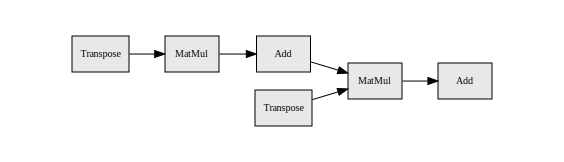

In [186]:
hl.build_graph(model1, torch.zeros([1]))

In [187]:
model2 = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                             torch.nn.Linear(hid, hid),
                             torch.nn.Sigmoid(),
                             torch.nn.Linear(hid, out))

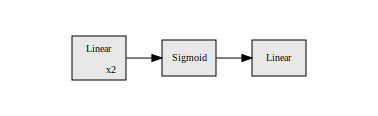

In [188]:
hl.build_graph(model2, torch.zeros([10, 1]))

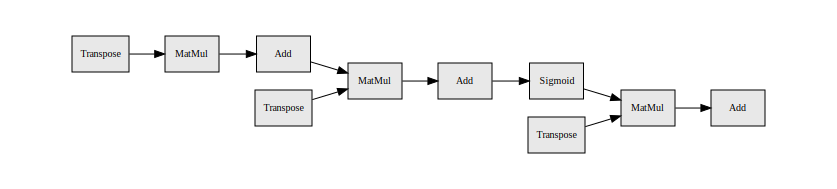

In [189]:
hl.build_graph(model2, torch.zeros([1]))

In [190]:
inp = 2
out = 1

hid = 100

In [191]:
model3 = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                             torch.nn.Linear(hid, hid),
                             torch.nn.Sigmoid(),
                             torch.nn.Linear(hid, out))

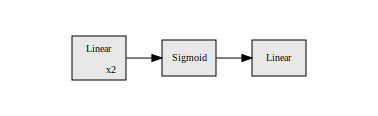

In [192]:
hl.build_graph(model3, torch.zeros([10, 2]))

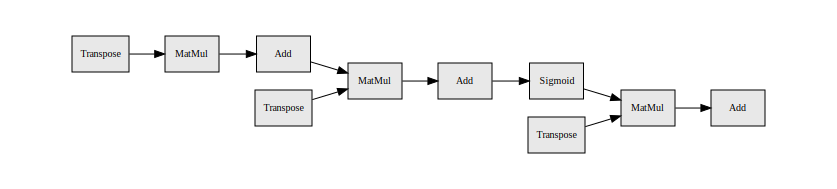

In [193]:
hl.build_graph(model3, torch.zeros([2]))

## Tensorflow (Static Computation Graph)

In [89]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


- w is a tensorflow variable
- x is a placeholder
- b is a constant

In [92]:
W = tf.Variable(6, name = 'var_W') #trainable 

x = tf.placeholder(tf.int32, shape = [3] ,name = 'x') #No initial value, the value will be fed in when we execute the computation graph

b = tf.constant(3, name = 'constant_b')#cannot change

In [93]:
W #you cannot see the detail of actual content

<tf.Variable 'var_W_1:0' shape=() dtype=int32_ref>

In [94]:
x

<tf.Tensor 'x_1:0' shape=(3,) dtype=int32>

In [95]:
b

<tf.Tensor 'constant_b_1:0' shape=() dtype=int32>

In [96]:
y = W*x + b # we define the computational graph but we have not execute it yet

#### We can't see any values that these variables hold because the graph hasnt been executed yet

In [97]:
y

<tf.Tensor 'add:0' shape=(3,) dtype=int32>

#### Initialize global variables

In [98]:
init = tf.global_variables_initializer()

#### A Session object encapsulates the environment in which Operation objects are executed, and Tensor objects are evaluated.

In [99]:
with tf.Session( )as sess: # a bridge between client program (python) and the c++ runtime used to exec TF
    sess.run(init)
    
    y_result = sess.run(y, feed_dict = {x:[10, 20, 30]}) #batch wise!
    
    print("Wx+b = ", y_result)

Wx+b =  [ 63 123 183]


#### The FileWriter class provides a mechanism to create an event file in a given directory and add summaries and events to it
graphs directory is created in the current working directory 

In [101]:
writer = tf.summary.FileWriter('./graphs', sess.graph)

To go to the tensorboard run the following command in your Terminal

#### tensorboard --logdir=graphs

#### its a good practice to close the session and writer

In [102]:
writer.close()

#### Returns the default graph for the current thread.

In [103]:
graph = tf.get_default_graph()

In [104]:
print(graph.get_operations())

[<tf.Operation 'var_W/initial_value' type=Const>, <tf.Operation 'var_W' type=VariableV2>, <tf.Operation 'var_W/Assign' type=Assign>, <tf.Operation 'var_W/read' type=Identity>, <tf.Operation 'x' type=Placeholder>, <tf.Operation 'constant_b' type=Const>, <tf.Operation 'var_W_1/initial_value' type=Const>, <tf.Operation 'var_W_1' type=VariableV2>, <tf.Operation 'var_W_1/Assign' type=Assign>, <tf.Operation 'var_W_1/read' type=Identity>, <tf.Operation 'x_1' type=Placeholder>, <tf.Operation 'constant_b_1' type=Const>, <tf.Operation 'mul' type=Mul>, <tf.Operation 'add' type=AddV2>, <tf.Operation 'init' type=NoOp>]


## Tensorflow (Eager Mode)

In [1]:
import numpy as np

import tensorflow as tf

In [2]:
# tf.enable_eager_execution()

In [3]:
tf.executing_eagerly() 

True

#### Only variable and constants are compatible with eager execution (No placeholder) 

In [4]:
W = tf.Variable(6, name = 'var_W')

x = tf.constant([10, 10], name = 'x')

b = tf.Variable(3, name = 'constant_b')

In [5]:
W

<tf.Variable 'var_W:0' shape=() dtype=int32, numpy=6>

In [6]:
x

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [7]:
b

<tf.Variable 'constant_b:0' shape=() dtype=int32, numpy=3>

In [8]:
y = W * x + b

In [9]:
y

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([63, 63], dtype=int32)>

In [10]:
print(y)

tf.Tensor([63 63], shape=(2,), dtype=int32)


In [11]:
print(W*x)

tf.Tensor([60 60], shape=(2,), dtype=int32)


https://www.tensorflow.org/guide/eager#work_with_graphs

In [12]:
np_result = np.multiply(W, x)

np_result

array([<tf.Tensor: shape=(), dtype=int32, numpy=60>,
       <tf.Tensor: shape=(), dtype=int32, numpy=60>], dtype=object)

In [13]:
W.numpy()

6

In [14]:
y.numpy()

array([63, 63], dtype=int32)

<img src="remoteJupyter.jpg">

In [ ]:
#c.NotebookApp.allow_remote_access = True

# THE MNIST DATABASE

Official webpage: http://yann.lecun.com/exdb/mnist/

The MNIST database contains 60,000 training images and 10,000 testing images. We can flatten this array into a vector of 28x28 = 784 numbers.

MNIST is a simple computer vision dataset. It consists of images of handwritten digits like these:

<img src="MNIST.png">

It also includes labels for each image, telling us which digit it is. For example, the labels for the above images are 5, 0, 4, and 1.

In [15]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset= dsets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset= dsets.MNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)

In [16]:
len(train_dataset)

60000

In [17]:
len(test_dataset)

10000

In [18]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [19]:
train_dataset[0][1]

5

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
train_dataset[0][0].numpy().shape

(1, 28, 28)

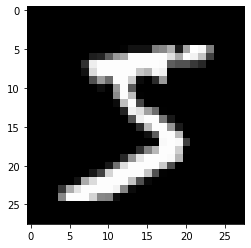

In [21]:
img = train_dataset[0][0].numpy().reshape(28,28)
plt.imshow(img,cmap='gray')

# Assignment 1



- Set Jupyter server in your home account so that you can use it remotely (Optional due to Covid-19!)
- Build 2 layer network for Logistic Regression Classifier using pure python/numpy 
    - Input data x : 20 x 784 (20 is the batch size)
    - label y : 20 x 10
    - Weight Variable W with random_normal initialization
    - Bias variable b with zeros
    - Use softmax activation => softmax(x.W+b)
    - Use OneHot encoding and MSE loss! Not the best way for classification but just for practice 
    - Train the model on MNIST
    - PS: If you dont know how to start see this: http://iamtrask.github.io/2015/07/12/basic-python-network/
- Submit your ipython notebook file to farazi@ais.uni-bonn.de with subject: Assignment1

## The subject of the mail should be Assignment1 (Otherwise, I might lose it in my inbox)

## Refrences:
## https://www.pluralsight.com/ (Foundation to PyTorch class)
## Pytorch Documents